# XGBoost

- Dataset from https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [0]:
# EDA
import numpy as np
import pandas as pd
#import modin.pandas as pd
import missingno
import seaborn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime as dt
from pandas.plotting import scatter_matrix
from xgboost import plot_importance

# preprocessing
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# algos

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# load data
!wget https://raw.githubusercontent.com/erinkhoo/hard-skill-learning-list-2019/master/Machine_Learning_Problems/XGBoost/diabetes.csv

# dataframe
dataset = pd.read_csv('diabetes.csv')

--2020-05-17 15:51:23--  https://raw.githubusercontent.com/erinkhoo/hard-skill-learning-list-2019/master/Machine_Learning_Problems/XGBoost/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.005s  

2020-05-17 15:51:23 (4.35 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [0]:
#
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


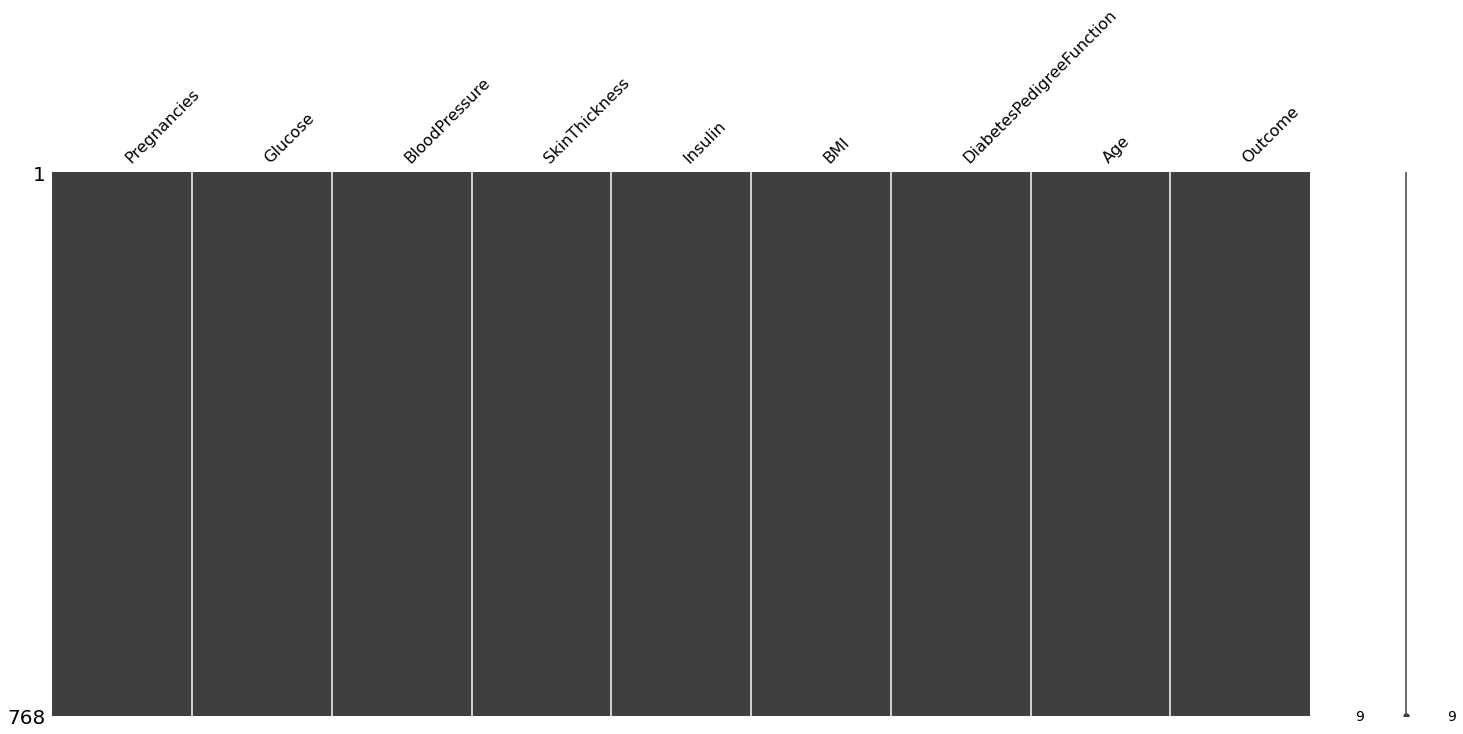

In [0]:
# missing values check
missingno.matrix(dataset)
plt.show()

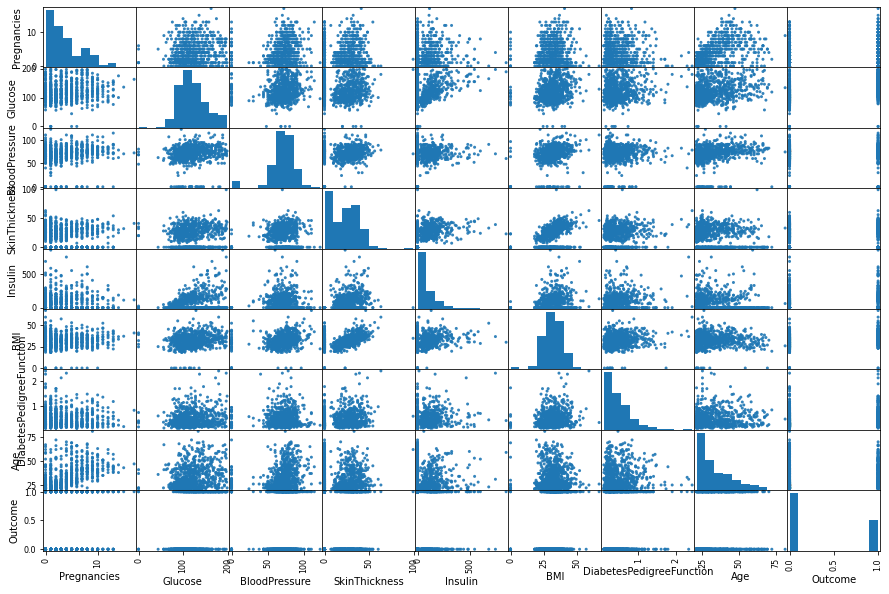

In [0]:
# scatterplot matrix on numerical features
scatter_matrix(dataset, figsize=(15,10), alpha=.9, diagonal='hist')
plt.show()

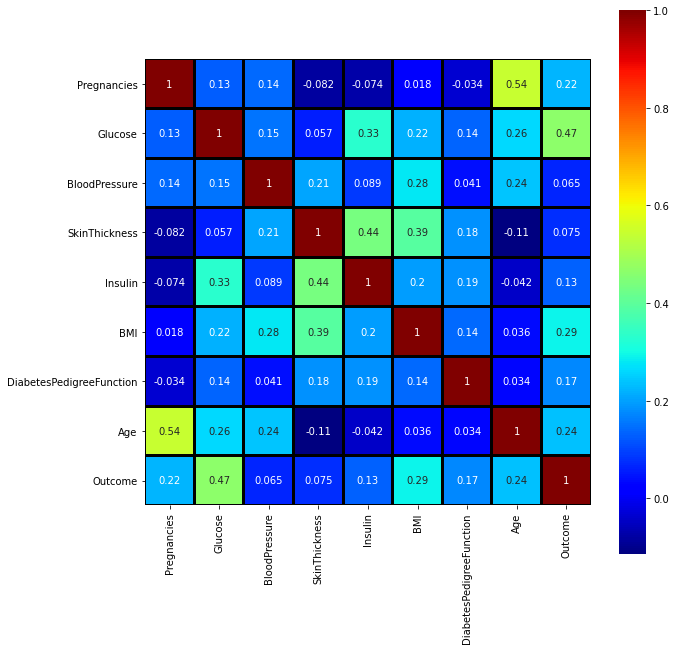

In [0]:
# correlation review
corr_matrix_dataset = dataset.corr()

f, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(corr_matrix_dataset, annot=True, square=True,
                cmap='jet', linewidths=2, linecolor='black')
plt.show()

In [0]:
# list of correlation 'strength'
corr_matrix_dataset['Outcome'].sort_values(ascending=True)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Raw Data Prep.

In [0]:
# select X; features and y; target
X = dataset.drop(['Outcome'], axis=1)
y = dataset['Outcome']

# NumPy
#X = dataset.drop(['Outcome'], axis=1).values
#y = dataset['Outcome'].values

In [0]:
# split data into train and text sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.25,
                                                    random_state=42)

---

In [0]:
# Grid Search
model_xgb = XGBClassifier(n_jobs=-1)

In [0]:
# XGB Grid Search parameters
params_XGB ={'max_depth': [3,4,5,6,7],
              'n_estimators': [50,100,150],
              'booster': ['gbtree','dart'],
              'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
              'learning_rate': [0.01, 0.1, 0.2, 0.35, 0.5]}

In [0]:
# Grid Search parameters
grid_XGB = GridSearchCV(model_xgb,
                        params_XGB,
                        n_jobs=-1,
                        cv=5,
                        scoring='neg_mean_squared_error')

In [0]:
# fit XGB model
grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'booster': ['gbtree', 'dart'],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.01, 0.1, 0.2, 0.

In [0]:
# best XGB paremeters
# {'booster': 'gbtree', 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
grid_XGB.best_params_

{'booster': 'gbtree',
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 100}

---

In [0]:
# fit tuned model on training data
model0 = XGBClassifier(random_state=42, booster='gbtree',
                       gamma=0.1, learning_rate=0.01,
                       max_depth=4, n_estimators=100)
model0.fit(X_train, y_train)

print(f'{model0}')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


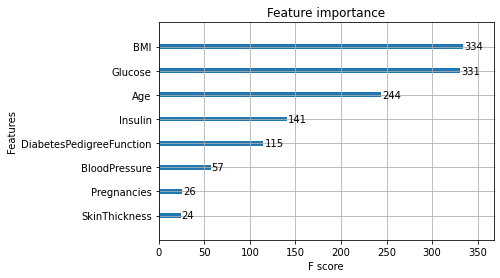

In [0]:
# plot feature importance
plot_importance(model0)
plt.show()

In [0]:
# make prediction on test data
y_pred = model0.predict(X_test)

In [0]:
# evaluate predictions
# DataFrame; "Model 0" Accuracy: 74.479%
# NumPy; "Model 0" Accuracy: 74.479%
# Tuned; "Model 0" Accuracy: 75.000%

accuracy = accuracy_score(y_test, y_pred)
print(f'"Model 0" Accuracy: {accuracy * 100:.3f}%')

"Model 0" Accuracy: 75.000%


#### Scale Data (predictors) for VotingClassifier & MLP w/ Tensorflow

This is for estimators who are not Decision Tree based
* `MinMaxScaler` = MMscaled



In [0]:
# predictor selection (all since all are numeric)
predictors_train = X_train
predictors_test = X_test

In [0]:
# data review
print(f'Train:  {predictors_train.shape}')
print(f'Test:   {predictors_test.shape}')

Train:  (576, 8)
Test:   (192, 8)


In [0]:
MMScaler = MinMaxScaler()
predictors_train_MMscaled = MMScaler.fit_transform(predictors_train)
predictors_test_MMscaled = MMScaler.fit_transform(predictors_test)

In [0]:
# data review | NumPy
print(f'Train:  {predictors_train_MMscaled.shape}')
print(f'Test:   {predictors_test_MMscaled.shape}')

Train:  (576, 8)
Test:   (192, 8)


### Voting Classifier

In [0]:
# voting_clf ensemble
log_clf = LogisticRegression(C=.5, max_iter=50, penalty='l2', solver='newton-cg')
erf_clf = ExtraTreesClassifier()
svm_clf = SVC(probability=True)
xgb_clf = XGBClassifier(tree_method='gpu_hist', n_jobs=-1, booster='gbtree', gamma=0.0, learning_rate=0.2, max_depth=7, n_estimators=50)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('erf', erf_clf), ('svm', svm_clf), ('xgb', xgb_clf)],
    voting='soft')

# fit model
voting_clf.fit(predictors_train_MMscaled, y_train)

# predicted target y using voting_clf ensemble ? (predict should be on X_test to get y_pred)
#y_pred_vc = voting_clf.predict(X_train)
y_pred = voting_clf.predict(predictors_test_MMscaled)

In [0]:
# accuracy score review
for clf in (log_clf, erf_clf, svm_clf, xgb_clf, voting_clf):
  clf.fit(predictors_train_MMscaled, y_train)
  y_pred = clf.predict(predictors_test_MMscaled)
  print(f'{clf.__class__.__name__}: {accuracy_score(y_test, y_pred):.6f}')

LogisticRegression: 0.770833
ExtraTreesClassifier: 0.739583
SVC: 0.729167
XGBClassifier: 0.718750
VotingClassifier: 0.750000


### Tensorflow Classification

In [0]:
# version check
print(f'Tensorflow Version: {tf.__version__}')
print(f'Keras Version:      {keras.__version__}')

Tensorflow Version: 2.2.0
Keras Version:      2.3.0-tf


In [0]:
# data review
print(f'X Train:        {X_train.shape}')
print(f'X Test:         {X_test.shape}')
print(f'----------------')
print(f'X Train scaled: {predictors_train_MMscaled.shape}')
print(f'X Test scaled:  {predictors_test_MMscaled.shape}')
print(f'================')
print(f'y Train:        {y_train.shape}')
print(f'y Test:         {y_test.shape}')

X Train:        (576, 8)
X Test:         (192, 8)
----------------
X Train scaled: (576, 8)
X Test scaled:  (192, 8)
y Train:        (576,)
y Test:         (192,)


In [0]:
# create model structure
tfmodel = keras.models.Sequential([
                                   keras.layers.Dense(64, activation='elu', input_shape=(8,)),
                                   keras.layers.Dropout(.25),
                                   keras.layers.Dense(32, activation='elu'),
                                   keras.layers.Dropout(.25),
                                   keras.layers.Dense(1, activation='softplus'),
                                   keras.layers.Dropout(.5),])

In [0]:
# create model structure
better_tfmodel = keras.models.Sequential([
                                          keras.layers.Dense(12, activation='relu', input_shape=(8,)),
                                          keras.layers.Dense(8, activation='relu'),
                                          keras.layers.Dropout(.333),
                                          keras.layers.Dense(1, activation='sigmoid')])
# compile model
better_tfmodel.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
# fit the model & store history
better_history = 0
better_history = better_tfmodel.fit(predictors_train_MMscaled, y_train,
                                    validation_split=.2, epochs=200, batch_size=10)

Epoch 1/200
46/46 [==============================] - 0s 6ms/step - loss: 0.6747 - accuracy: 0.6043 - val_loss: 0.6742 - val_accuracy: 0.6207
Epoch 2/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.6217 - val_loss: 0.6708 - val_accuracy: 0.6207
Epoch 3/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.6522 - val_loss: 0.6678 - val_accuracy: 0.6207
Epoch 4/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6492 - accuracy: 0.6609 - val_loss: 0.6656 - val_accuracy: 0.6207
Epoch 5/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6652 - val_loss: 0.6639 - val_accuracy: 0.6207
Epoch 6/200
46/46 [==============================] - 0s 5ms/step - loss: 0.6541 - accuracy: 0.6630 - val_loss: 0.6614 - val_accuracy: 0.6207
Epoch 7/200
46/46 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.6630 - val_loss: 0.6587 - val_accuracy: 0.6207
Epoch 8/200
4

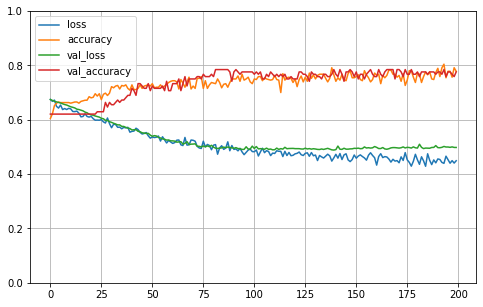

{'verbose': 1, 'epochs': 200, 'steps': 46}
6/6 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.7292
TEST:     [0.7124889492988586, 0.7291666865348816]
METRICS:  ['loss', 'accuracy']
18/18 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8108
TRAIN:    [0.42714202404022217, 0.8107638955116272]


In [0]:
# plt model metrics
pd.DataFrame(better_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
print(f'{better_history.params}')

# evaluate model
# TEST:
# Adam    - loss: 0.6496 - accuracy: 0.7500, epoch; 200
# Adam    - loss: 0.5564 - accuracy: 0.7552, epoch; 200
# RMSProp - loss: 0.7125 - accuracy: 0.7292, epoch; 200
print(f'TEST:     {better_tfmodel.evaluate(predictors_test_MMscaled, y_test)}')
print(f'METRICS:  {better_tfmodel.metrics_names}')
print(f'TRAIN:    {better_tfmodel.evaluate(predictors_train_MMscaled, y_train)}')

In [0]:
# summary
tfmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
_________________________________________________________________
dropout_13 (Dropout)         (None, 1)                 0         
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
____________________________________________________

In [0]:
# compile model
tfmodel.compile(loss='mse',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [0]:
# store history of model epochs
history = 0
history = tfmodel.fit(predictors_train_MMscaled, y_train,
                      validation_split=.2, epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 12ms/step - loss: 0.2368 - accuracy: 0.7348 - val_loss: 0.2303 - val_accuracy: 0.6121
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2576 - accuracy: 0.6913 - val_loss: 0.2303 - val_accuracy: 0.6121
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2477 - accuracy: 0.7196 - val_loss: 0.2303 - val_accuracy: 0.6121
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 0.7196 - val_loss: 0.2303 - val_accuracy: 0.6121
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2703 - accuracy: 0.6978 - val_loss: 0.2303 - val_accuracy: 0.6121
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2442 - accuracy: 0.7130 - val_loss: 0.2302 - val_accuracy: 0.6121
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2433 - accuracy: 0.7174 - val_loss: 0.2302 - val_accuracy: 0.6121
Epoch 8/100


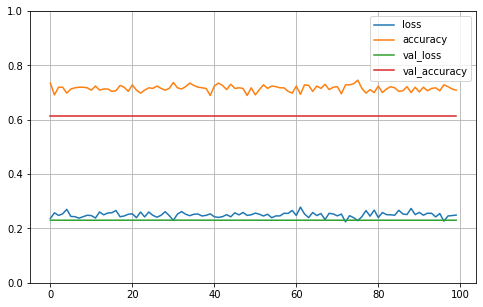

{'verbose': 1, 'epochs': 100, 'steps': 15}


In [0]:
# plt model metrics
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

print(f'{history.params}')

In [0]:
# evaluate model
# TEST:
# Adam    - loss: 0.2273 - accuracy: 0.6562, epoch; 100
# RMSProp - loss: 0.2203 - accuracy: 0.6510, epoch; 100
# Adadelta- loss: 0.2859 - accuracy: 0.3073, epoch; 100

print(f'METRICS:  {tfmodel.metrics_names}')
print(f'TEST:     {tfmodel.evaluate(predictors_test_MMscaled, y_test)}')
print(f'TRAIN:    {tfmodel.evaluate(predictors_train_MMscaled, y_train)}')

METRICS:  ['loss', 'accuracy']
6/6 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.6562
TEST:     [0.2281925231218338, 0.65625]
18/18 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.6667
TRAIN:    [0.21026889979839325, 0.6666666865348816]


In [0]:
# save model
better_tfmodel.save('81.h5')

---